## Imports

In [1]:
# ONLY RUN THIS ONCE
%load_ext autoreload
%autoreload 2

import os
os.chdir(os.path.dirname(os.getcwd()))
!pwd

/home/omer/code/mareksherman/classipy


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

from datagen.data import Data
from datagen.gbq_data import GBQDataset


## Class Test

In [7]:
g = GBQDataset(n_datasets=1)
g.download_datasets()

Processing: bigquery-public-data.austin_bikeshare:bikeshare_trips


/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1967: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  df[column] = pandas.Series(df[column], dtype=dtypes[column])


Completed : bigquery-public-data.austin_bikeshare:bikeshare_trips
Completed Downloading Datasets


In [4]:
test_df = pd.read_csv('raw_data/gbq_data.csv')
print(test_df.shape)
test_df

(51, 13)


,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,mean,std,median,skew,kurt,shapiro_wilk_test
0,bigquery-public-data.austin_bikeshare,bikeshare_trips,trip_id,NaN,"['10484691, 9900031869, 12460390, 9900000104, ...",[ 10484691 9900031869 12460390 9900000104 ...,1000,2744825634.11,4420116116.340697,18790423.5,1.003704,-0.994569,1.961818e-44
1,bigquery-public-data.austin_bikeshare,bikeshare_trips,subscriber_type,NaN,"['Local365, Local31, Local30, U.T. Student Mem...",['Local365' 'Local31' 'Local30' 'U.T. Student ...,26,NaN,NaN,NaN,NaN,NaN,NaN
2,bigquery-public-data.austin_bikeshare,bikeshare_trips,bikeid,NaN,"['544, 663, 417, 956, 298, 80, 664, 2232, 28, ...",['544' '663' '417' '956' '298' '80' '664' '223...,542,NaN,NaN,NaN,NaN,NaN,NaN
3,bigquery-public-data.austin_bikeshare,bikeshare_trips,start_time,NaN,"['2015-05-18 10:12:00+00:00, 2021-04-18 13:43:...","<DatetimeArray>\n['2015-05-18 10:12:00+00:00',...",997,2017-08-04 05:59:58.782000128+00:00,726 days 20:24:11.697603776,2017-10-07 18:55:04.500000+00:00,NaN,NaN,NaN
4,bigquery-public-data.austin_bikeshare,bikeshare_trips,start_station_id,NaN,"['2495.0, 2567.0, 2707.0, 2494.0, 3798.0, 4057...",[2495. 2567. 2707. 2494. 3798. 4057. nan 379...,88,2943.229979466119,604.3258893674106,2571.0,0.323263,-0.364234,1.000000e+00
5,bigquery-public-data.austin_bikeshare,bikeshare_trips,start_station_name,NaN,"['Nueces & 26th, Rio Grande & 28th, Brazos & 6...",['Nueces & 26th' 'Rio Grande & 28th' 'Brazos &...,132,NaN,NaN,NaN,NaN,NaN,NaN
6,bigquery-public-data.austin_bikeshare,bikeshare_trips,end_station_id,NaN,"['2547, 2570, 2498, 3792, 3793, 2574, 2498, 25...",['2547' '2570' '2498' '3792' '3793' '2574' '25...,86,NaN,NaN,2566.0,0.682649,-0.209482,NaN
7,bigquery-public-data.austin_bikeshare,bikeshare_trips,end_station_name,NaN,"['21st & Speedway @PCL, Congress & Cesar Chave...",['21st & Speedway @PCL' 'Congress & Cesar Chav...,135,NaN,NaN,NaN,NaN,NaN,NaN
8,bigquery-public-data.austin_bikeshare,bikeshare_trips,duration_minutes,NaN,"['10, 24, 4, 1, 19, 80, 6, 4, 4, 8, 30, 20, 12...",[ 10 24 4 1 19 80 6 8 30 20 12 ...,124,27.94,60.015867104494156,13.0,9.228678,112.874918,0.000000e+00
9,bigquery-public-data.austin_crime,crime,unique_key,NaN,"['2015740774.0, 20145000690.0, 2016740147.0, 2...",[2.01574077e+09 2.01450007e+10 2.01674015e+09 ...,1000,17743322848.357,6186879186.353637,20152561648.5,-2.181003,2.769751,0.000000e+00


In [6]:
pd.read_csv('raw_data/combined_data.csv')

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,mean,std,median,skew,kurt,shapiro_wilk_test
0,bigquery-public-data.austin_bikeshare,bikeshare_trips,trip_id,NaN,"['10484691, 9900031869, 12460390, 9900000104, ...",[ 10484691 9900031869 12460390 9900000104 ...,1000,2744825634.11,4420116116.340697,18790423.5,1.003704,-0.994569,1.961818e-44
1,bigquery-public-data.austin_bikeshare,bikeshare_trips,subscriber_type,NaN,"['Local365, Local31, Local30, U.T. Student Mem...",['Local365' 'Local31' 'Local30' 'U.T. Student ...,26,NaN,NaN,NaN,NaN,NaN,NaN
2,bigquery-public-data.austin_bikeshare,bikeshare_trips,bikeid,NaN,"['544, 663, 417, 956, 298, 80, 664, 2232, 28, ...",['544' '663' '417' '956' '298' '80' '664' '223...,542,NaN,NaN,NaN,NaN,NaN,NaN
3,bigquery-public-data.austin_bikeshare,bikeshare_trips,start_time,NaN,"['2015-05-18 10:12:00+00:00, 2021-04-18 13:43:...","<DatetimeArray>\n['2015-05-18 10:12:00+00:00',...",997,2017-08-04 05:59:58.782000128+00:00,726 days 20:24:11.697603776,2017-10-07 18:55:04.500000+00:00,NaN,NaN,NaN
4,bigquery-public-data.austin_bikeshare,bikeshare_trips,start_station_id,NaN,"['2495.0, 2567.0, 2707.0, 2494.0, 3798.0, 4057...",[2495. 2567. 2707. 2494. 3798. 4057. nan 379...,88,2943.229979466119,604.3258893674106,2571.0,0.323263,-0.364234,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,fernandol/countries-of-the-world,/home/omer/code/mareksherman/classipy/raw_data...,Birthrate,NaN,"['46,6, 15,11, 17,14, 22,46, 8,71, 45,11, 14,1...","['46,6' '15,11' '17,14' '22,46' '8,71' '45,11'...",220,NaN,NaN,NaN,NaN,NaN,NaN
191,fernandol/countries-of-the-world,/home/omer/code/mareksherman/classipy/raw_data...,Deathrate,NaN,"['20,34, 5,22, 4,61, 3,27, 6,25, 24,2, 5,34, 5...","['20,34' '5,22' '4,61' '3,27' '6,25' '24,2' '5...",201,NaN,NaN,NaN,NaN,NaN,NaN
192,fernandol/countries-of-the-world,/home/omer/code/mareksherman/classipy/raw_data...,Agriculture,NaN,"['0,38, 0,232, 0,101, nan, nan, 0,096, 0,04, 0...","['0,38' '0,232' '0,101' nan '0,096' '0,04' '0,...",150,NaN,NaN,NaN,NaN,NaN,NaN
193,fernandol/countries-of-the-world,/home/omer/code/mareksherman/classipy/raw_data...,Industry,NaN,"['0,24, 0,188, 0,6, nan, nan, 0,658, 0,18, 0,2...","['0,24' '0,188' '0,6' nan '0,658' '0,18' '0,22...",155,NaN,NaN,NaN,NaN,NaN,NaN


## DO NOT TOUCH!

In [199]:
dataset_name = "bigquery-public-data.austin_crime.crime"
dataset_rows = [get_row(crime_df[col_name],dataset_name) for col_name in crime_df]
output_dataset = pd.concat(dataset_rows, axis=0).reset_index(drop=True)
output_dataset.head(10)
    

,dataset_name,column_name,column_values,nunique_values,mean,std,median,shapiro_wilk_test,label
0,bigquery-public-data.austin_crime.crime,unique_key,"20145040798.0, 20155003516.0, 20151881192.0, 2...",1000,1.770501e+10,6.230494e+09,2.015214e+10,0.0,NaN
1,bigquery-public-data.austin_crime.crime,address,"1715 W CESAR CHAVEZ ST Austin, TX 78703 (30.27...",888,NaN,NaN,NaN,NaN,NaN
2,bigquery-public-data.austin_crime.crime,census_tract,"18.21, 24.28, 23.07, 6.04, 18.39, 18.4, 12.0, ...",178,8.352951e+01,7.595945e+02,1.819000e+01,1.0,NaN
3,bigquery-public-data.austin_crime.crime,clearance_date,"2015-05-21 12:00:00+00:00, 2014-05-29 12:00:00...",569,NaN,NaN,NaN,NaN,NaN
4,bigquery-public-data.austin_crime.crime,clearance_status,"Not cleared, Not cleared, Not cleared, Not cle...",3,NaN,NaN,NaN,NaN,NaN
5,bigquery-public-data.austin_crime.crime,council_district_code,"1.0, 4.0, 1.0, 2.0, 4.0, 5.0, 4.0, 7.0, 3.0, 3...",10,5.297679e+00,2.852464e+00,5.000000e+00,1.0,NaN
6,bigquery-public-data.austin_crime.crime,description,"BURGLARY NON RESIDENCE , BURG NON RESID...",30,NaN,NaN,NaN,NaN,NaN
7,bigquery-public-data.austin_crime.crime,district,"B, D, F, E, I, B, I, E, A, F, G, D, D, C, G, F...",11,NaN,NaN,NaN,NaN,NaN
8,bigquery-public-data.austin_crime.crime,latitude,"30.23763, nan, nan, nan, 30.264273, nan, 30.26...",270,3.029117e+01,7.353777e-02,3.027568e+01,1.0,NaN
9,bigquery-public-data.austin_crime.crime,longitude,"nan, nan, nan, -97.83889, nan, nan, -97.739377...",266,-9.773527e+01,4.765600e-02,-9.772925e+01,1.0,NaN


## Shapiro Value > 0.5 indicates Normality

/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

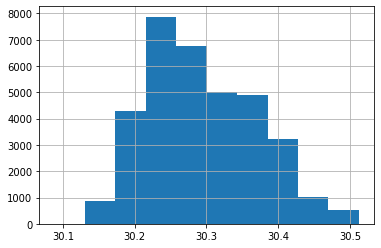

In [197]:
crime_df.latitude.hist()
shapiro(crime_df.latitude)
